# Part 2a. Logistic Regression (classigying activities)

### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Split train-test datasets

In [2]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
x_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
x_test = df_test.drop(['subject', 'Activity'], axis=1)

### 3. Build Logistic Regression before Hyperparameter Tuning

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logistic_model1 = LogisticRegression()
logistic_model1.fit(x_train, y_train)
y_pred = logistic_model1.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred)

####  a) Accuracy

In [4]:
accuracy = logistic_model1.score(x_test, y_test)*100
print("Accuracy:",accuracy)

Accuracy: 95.82626399728538


#### b) Confusion Table

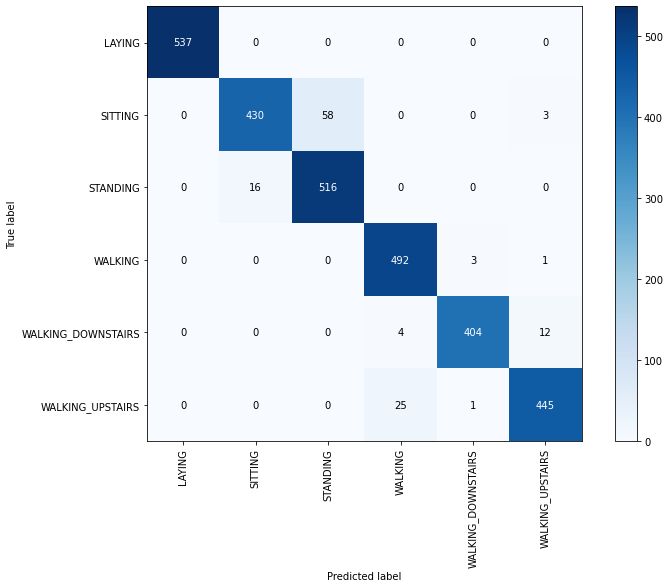

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(cm1, cmap=plt.cm.Blues)
ax.figure.colorbar(ax.imshow(cm1, cmap=plt.cm.Blues), ax=ax)
ax.set(
    xticks=np.arange(cm1.shape[1]),
    yticks=np.arange(cm1.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm1.max() / 2.
for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            ax.text(j, i, int(cm1[i, j]),ha="center", va="center",color="white" if cm1[i, j] > thresh else "black")

### 4. Build Logistic Regression with Hyperparameter Tuning

In [6]:
parameter = {
    'penalty' : ['l1', 'l2'],
    'C' : np.arange(10, 60, 10),
    }
from sklearn.model_selection import RandomizedSearchCV
logistic_model2 = RandomizedSearchCV(logistic_model1, param_distributions = parameter, cv = 5, random_state=42)
best_lrm = logistic_model2.fit(x_train,y_train)
y_pred2 = best_lrm.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)

#### a) Accuracy

In [7]:
accuracy = best_lrm.score(x_test, y_test)*100
print("Accuracy:",accuracy)

Accuracy: 95.35120461486257


#### b) Confusion Table

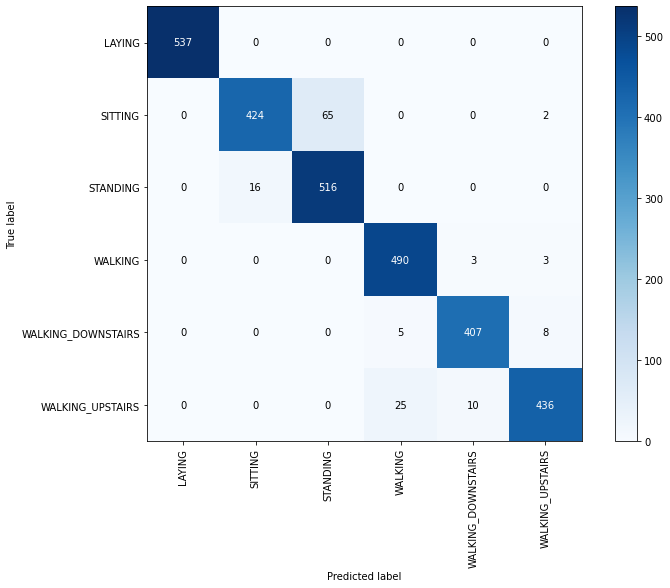

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(cm2, cmap=plt.cm.Blues)
ax.figure.colorbar(ax.imshow(cm2, cmap=plt.cm.Blues), ax=ax)
ax.set(
    xticks=np.arange(cm2.shape[1]),
    yticks=np.arange(cm2.shape[0]),
    xticklabels=np.unique(y_pred2),
    yticklabels=np.unique(y_pred2),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            ax.text(j, i, int(cm2[i, j]),ha="center", va="center",color="white" if cm2[i, j] > thresh else "black")

### 5. Finding out sorted feature list by importance

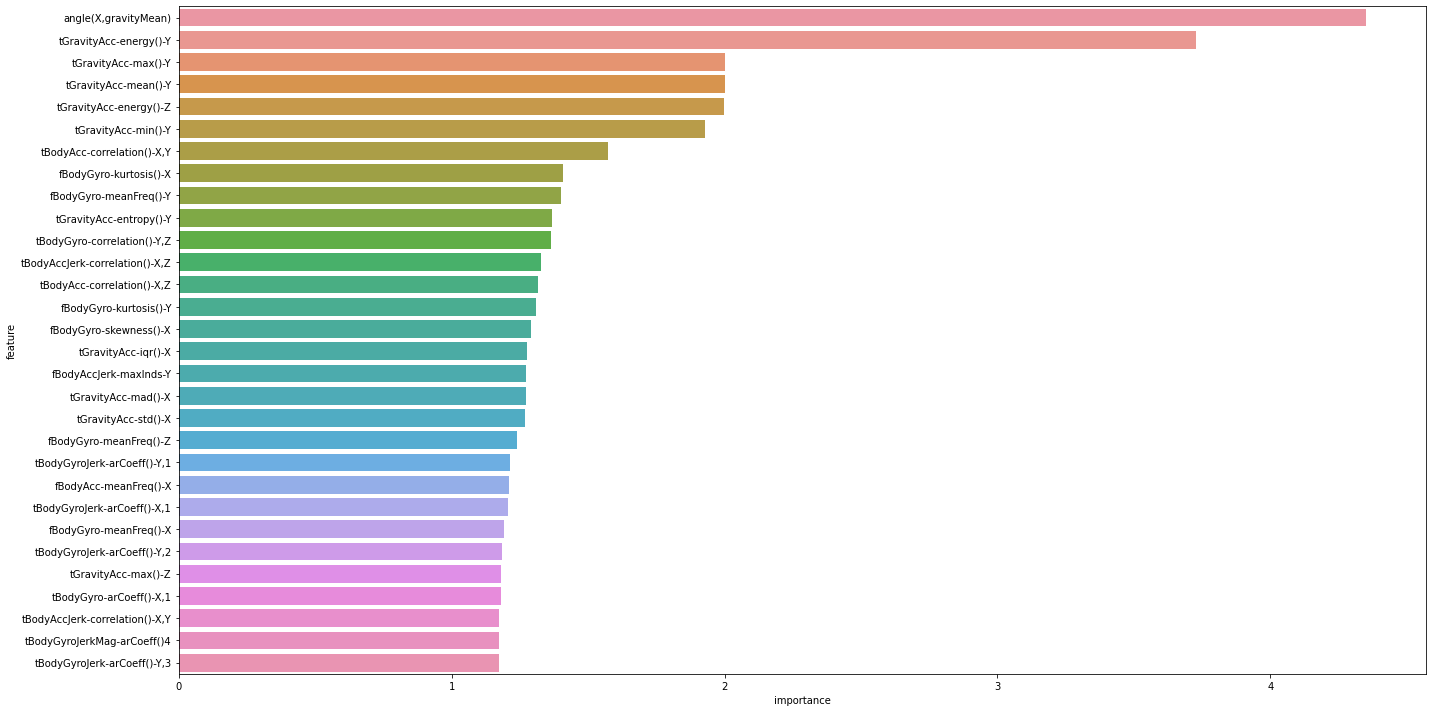

In [20]:
import math
w=logistic_model1.coef_[0]
df2 = pd.DataFrame(df_train.columns, columns = ["feature"])
logistic_feature_importance = df2[:-2]
logistic_feature_importance["importance"] = pow(math.e, w)
logistic_feature_importance = logistic_feature_importance.sort_values(by = ["importance"], ascending=False)
plt.figure(figsize=(20, 10))
sb.barplot(x="importance", y="feature", data=logistic_feature_importance.head(30))
plt.tight_layout()
plt.show()

### 6. Drop main features one by one and retrain the model

In [ ]:
main_feature_list = ['fBodyAcc','fBodyGyro','fBodyAccJerk','tGravityAcc','tBodyAcc','tBodyGyroJerk','tBodyGyro','tBodyAccJerk',
                     'tBodyAccMag','tGravityAccMag','tBodyAccJerkMag','tBodyGyroMag','tBodyGyroJerkMag','fBodyAccMag',
                     'fBodyBodyAccJerkMag','fBodyBodyGyroMag','fBodyBodyGyroJerkMag','angle']
for feature in main_feature_list:
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    rf_Model_main = RandomForestClassifier(max_depth=50, n_estimators=157)
    rf_Model_main.fit(X_train_drop_main_feature, y_train)
    y_pred_drop_main =rf_Model_main.predict(X_test_drop_main_feature)
    print("drop " + feature + ":")
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

In [22]:
logistic_top30_list

In [25]:
for param in logistic_top30_list:
    if param in randomForest_top30_list and param in lightgbm_top30_list:
        mutual_features.append(param)

In [26]:
mutual_features

['tGravityAcc-energy()-Y',
 'tGravityAcc-max()-Y',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-min()-Y']

In [27]:
y_train2 = df_train.Activity
x_train2 = df_train.drop([
    'subject',
    'Activity',
    'tGravityAcc-energy()-Y',
    'tGravityAcc-max()-Y',
    'tGravityAcc-mean()-Y',
    'tGravityAcc-energy()-Z',
    'tGravityAcc-min()-Y',], axis=1)

y_test2 = df_test.Activity
x_test2 = df_test.drop([
    'subject',
    'Activity',
    'tGravityAcc-energy()-Y',
    'tGravityAcc-max()-Y',
    'tGravityAcc-mean()-Y',
    'tGravityAcc-energy()-Z',
    'tGravityAcc-min()-Y'], axis=1)

In [29]:
logistic_model3 = LogisticRegression()
logistic_model3.fit(x_train2, y_train2)
y_pred = logistic_model3.predict(x_test2)


In [59]:
accuracy = logistic_model3.score(x_test2, y_test2)*100
print("Accuracy after removing common feature importance:",accuracy)

Accuracy after removing common feature importance: 96.06379368849677


#### Retesting by completely removing accelerometer

In [51]:
y_train3 = df_train.Activity
x_train3 = df_train.drop(['subject', 'Activity'], axis=1)
x_train3 = x_train3[x_train3.columns.drop(list(x_train3.filter(regex='Acc')))]

y_test3 = df_test.Activity
x_test3 = df_test.drop(['subject', 'Activity'], axis=1)
x_test3 = x_test3[x_test3.columns.drop(list(x_test3.filter(regex='Acc')))]


In [56]:
logistic_model4 = LogisticRegression()
logistic_model4.fit(x_train3, y_train3)
y_pred = logistic_model4.predict(x_test3)

In [58]:
accuracy = logistic_model4.score(x_test3, y_test3)*100
print("Accuracy after removing accelerometer data:",accuracy)

Accuracy after removing accelerometer data: 90.97387173396675


#### Retesting by completely removing gyroscope

In [60]:
y_train4 = df_train.Activity
x_train4 = df_train.drop(['subject', 'Activity'], axis=1)
x_train4 = x_train4[x_train4.columns.drop(list(x_train4.filter(regex='Acc')))]

y_test4 = df_test.Activity
x_test4 = df_test.drop(['subject', 'Activity'], axis=1)
x_test4 = x_test4[x_test4.columns.drop(list(x_test4.filter(regex='Acc')))]

In [61]:
logistic_model5 = LogisticRegression()
logistic_model5.fit(x_train4, y_train4)
y_pred = logistic_model5.predict(x_test4)

In [62]:
accuracy = logistic_model4.score(x_test3, y_test3)*100
print("Accuracy after removing gyroscope data:",accuracy)

Accuracy after removing gyroscope data: 90.97387173396675
